# Import libraries and connect dataset

In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn import preprocessing

import time
data = pd.read_csv('dataset/WineQT.csv')

# Dataset preprocessing

In [83]:
print(f"Training data info:\n{data.info()}")
print(f"Training data shape: {data.shape}")
print(f"Training data columns: {data.columns}")
print(f"Training data sample: {data.head()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
Training data info:
None
Training data shape: (1143, 13)
Training data colu

# Vizualisation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000,1137.000000
mean,8.310378,0.529406,0.268663,2.531442,0.086836,15.654793,46.027704,0.996725,3.310748,0.658276,10.446072,5.671064
std,1.746979,0.176443,0.196239,1.355849,0.047241,10.254819,32.808924,0.001923,0.156720,0.170573,1.082073,0.784409
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.200000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997830,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.330000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


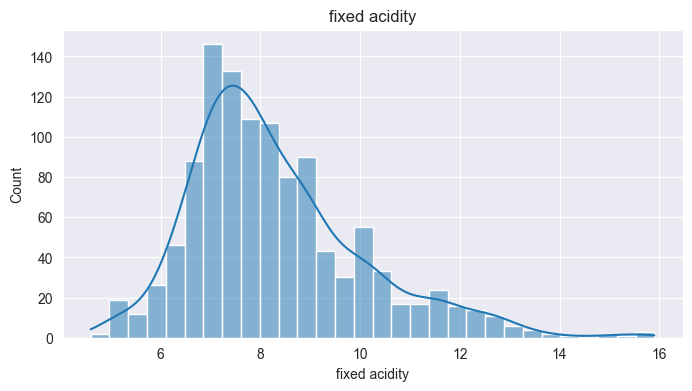

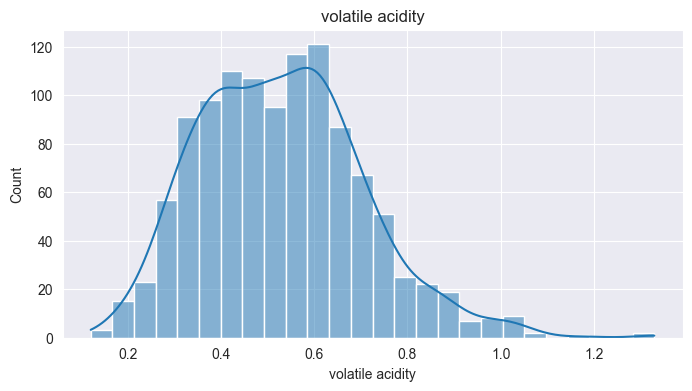

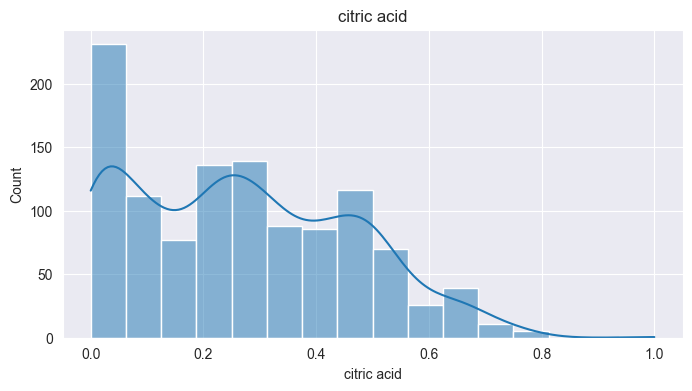

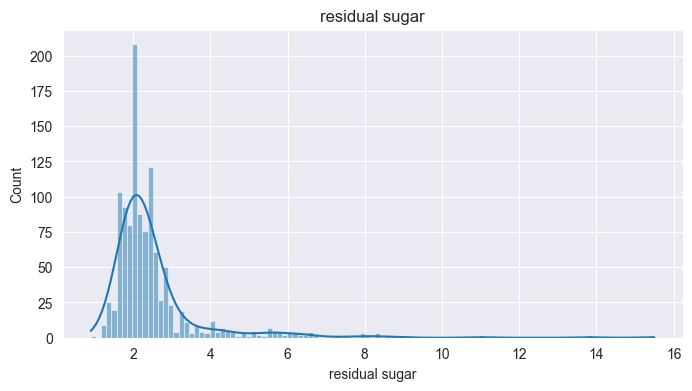

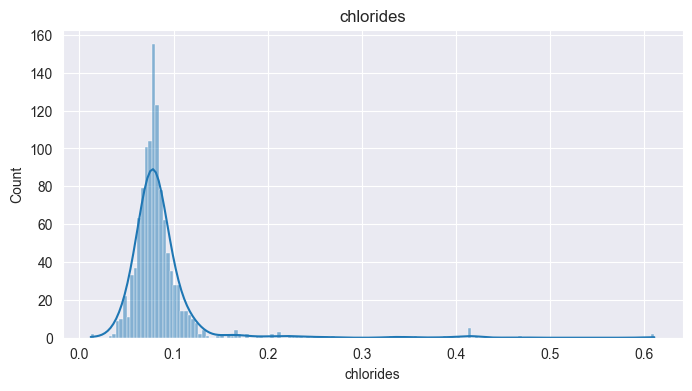

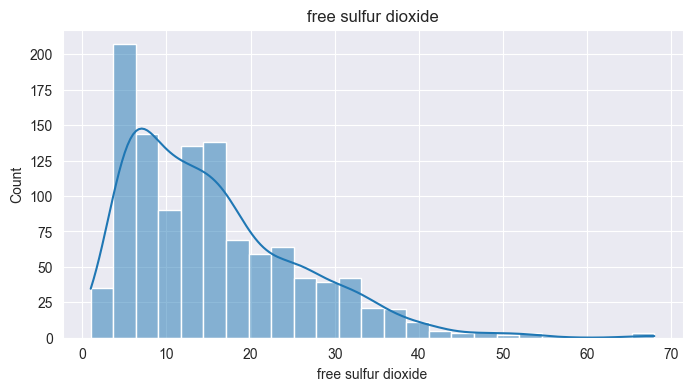

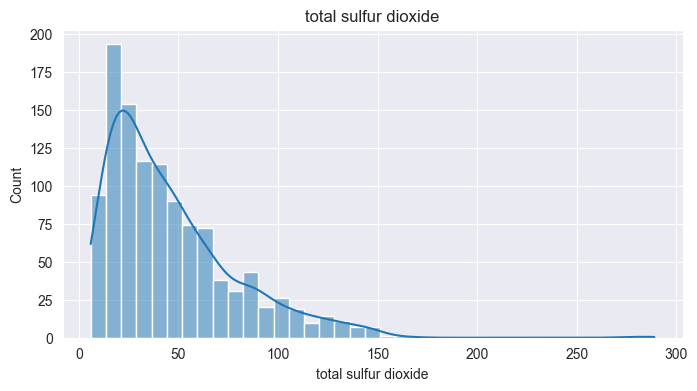

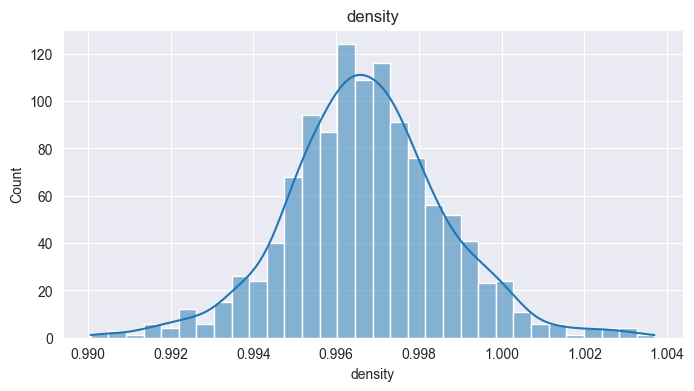

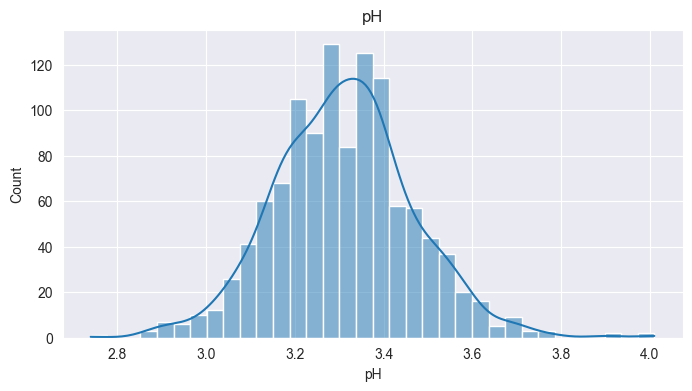

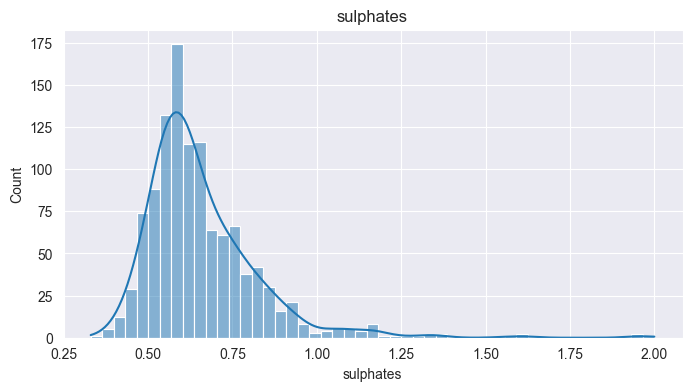

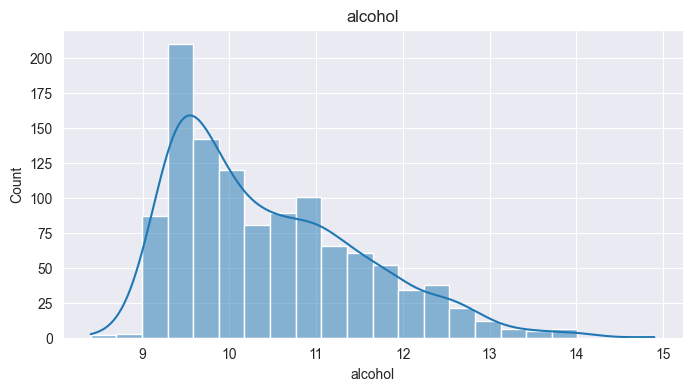

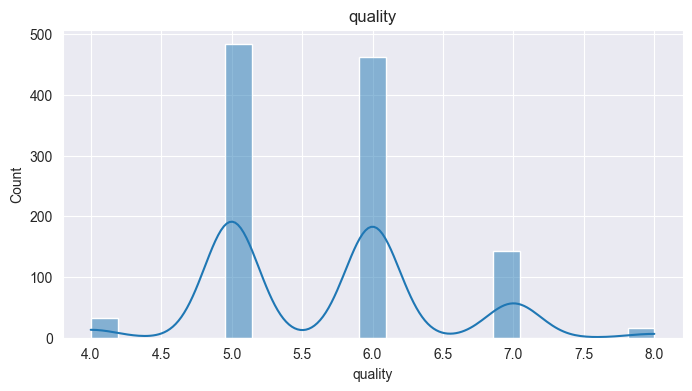

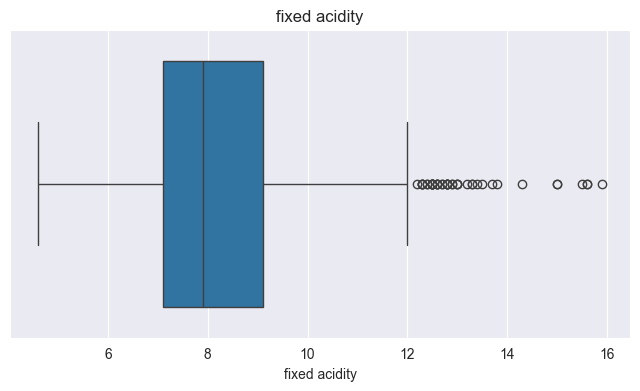

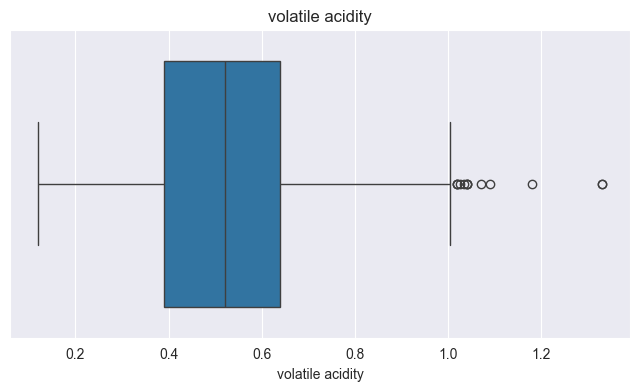

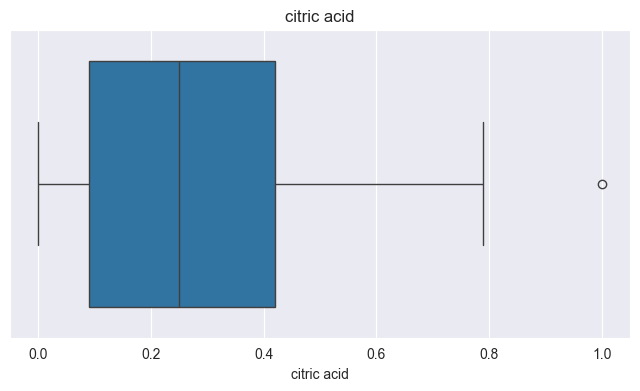

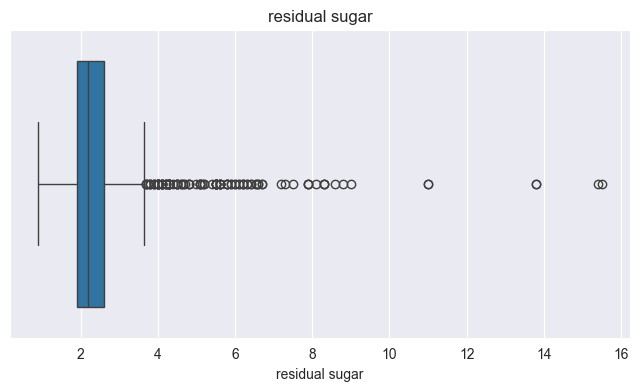

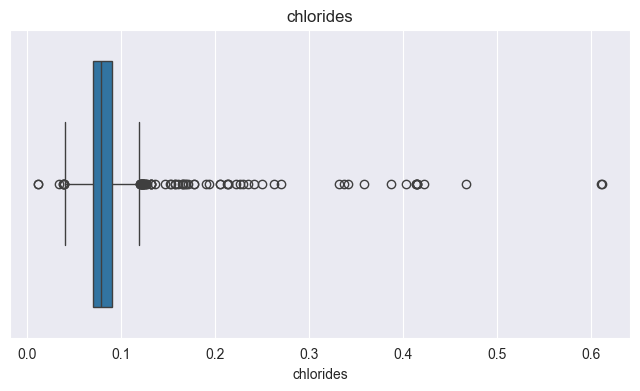

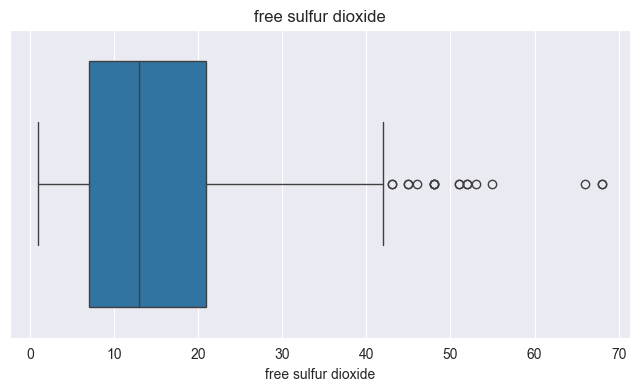

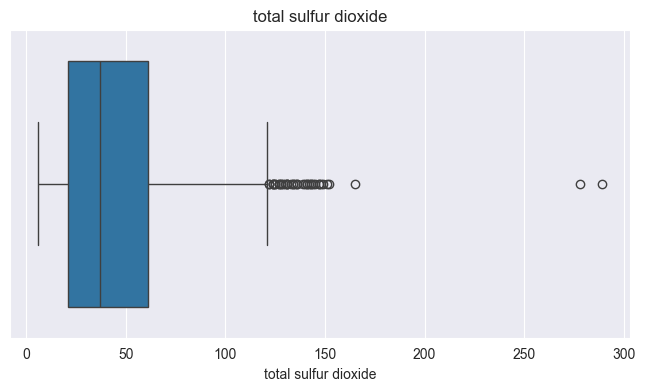

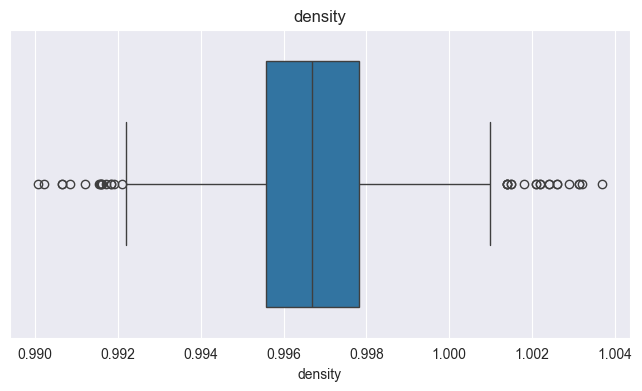

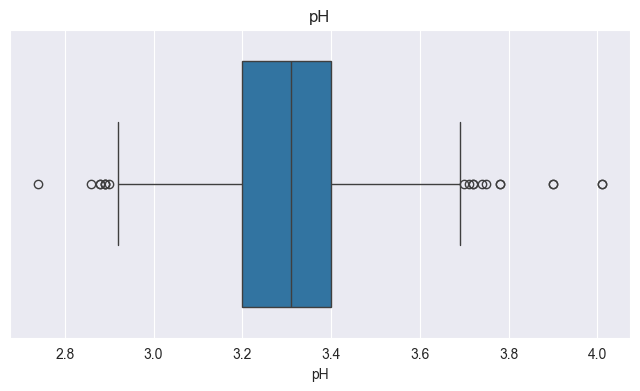

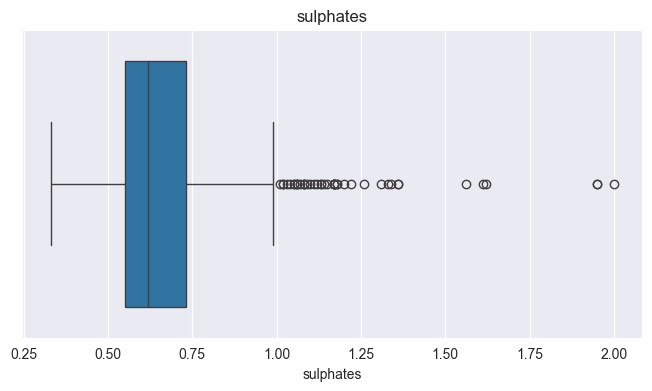

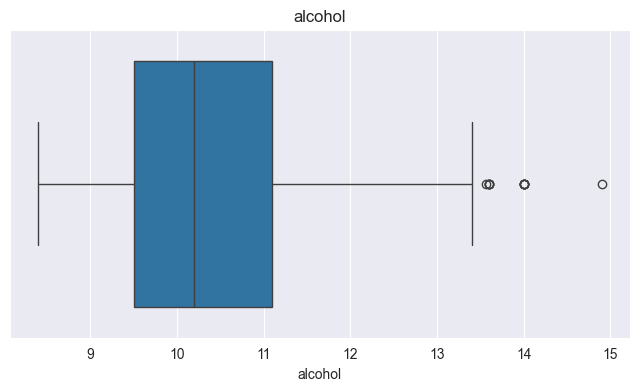

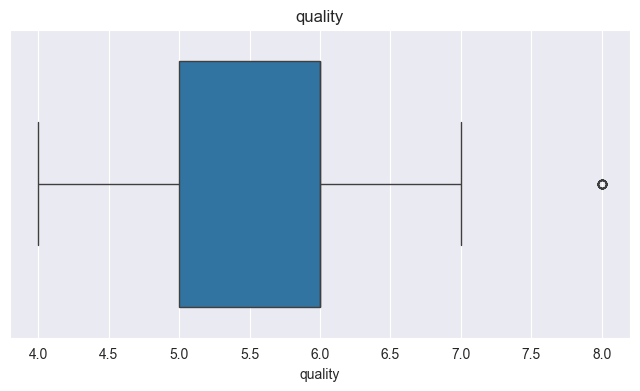

Index([], dtype='object')


In [84]:
data = data[data['quality'] != 3]
numeric = data.select_dtypes(include=['int64', 'float64']).columns
categorical = data.select_dtypes(exclude=['int64', 'float64']).columns
target_col = 'quality'
numeric = numeric.drop('Id')
# if target_col in numeric:
#     numeric = numeric.drop(target_col)
# if target_col in categorical:
#     categorical = categorical.drop(target_col)


variance = data[numeric].var().sort_values(ascending=False)
display(data[numeric].describe())

for feature in numeric:
    plt.figure(figsize=(8,4))
    sns.histplot(data[feature].dropna(), kde=True)
    plt.title(feature)
    plt.show()
    
for feature in numeric:
    plt.figure(figsize=(8,4))
    sns.boxplot(x = data[feature].dropna())
    plt.title(feature)
    plt.show()

print(categorical)

# Data preproccesing

In [85]:
X = data.drop(columns=[target_col, "Id"])
y = data[target_col]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)




{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.5964912280701754
Classification Report:
               precision    recall  f1-score   support

           4       1.00      0.00      0.00         5
           5       0.69      0.79      0.74        72
           6       0.57      0.56      0.57        70
           7       0.30      0.29      0.29        21
           8       1.00      0.00      0.00         3

    accuracy                           0.60       171
   macro avg       0.71      0.33      0.32       171
weighted avg       0.61      0.60      0.58       171



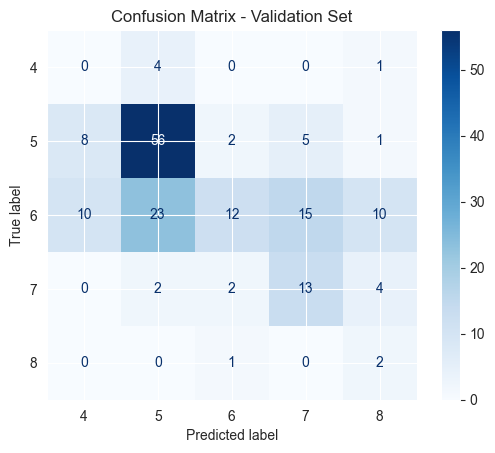

In [86]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
dt_classifier = DecisionTreeClassifier(max_depth=grid_search.best_params_['max_depth'], criterion=grid_search.best_params_['criterion'], min_samples_leaf = grid_search.best_params_['min_samples_leaf'], min_samples_split = grid_search.best_params_['min_samples_split'], random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("Classification Report:\n", classification_report(y_val, y_pred, zero_division=True))
# Compute confusion matrix
cm_val = confusion_matrix(y_val, y_val_pred)

# Using sklearn's ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_val, display_labels=dt_classifier.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Validation Set")
plt.show()

